In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np


file_path = 'PriceHistory S&P 10 year.xlsx'
df = pd.read_excel(file_path,header=2)
df

,Date,Price,CVol,Change,% Change,"Total Return (Gross, Unhedged)","Cumulative Return % (Gross, Unhedged)",Open,High,Low
0,2024-02-26,5078.500000,0.000000e+00,-10.299948,-0.202404,11041.895884,232.472133,5093.00,5079.17,5078.50
1,2024-02-23,5088.799948,2.267489e+09,1.767515,0.034746,11041.895884,232.472133,5100.92,5111.06,5081.46
2,2024-02-22,5087.032433,2.592731e+09,105.235435,2.112399,11037.823626,232.349517,5038.83,5094.39,5038.83
3,2024-02-21,4981.796998,2.288994e+09,6.285731,0.126333,10808.929189,225.457492,4963.03,4983.21,4946.00
4,2024-02-20,4975.511267,2.483889e+09,-30.057184,-0.600475,10794.799232,225.032038,4989.32,4993.71,4955.02
...,...,...,...,...,...,...,...,...,...,...
2512,2014-03-04,1873.913727,2.531994e+09,28.179285,1.526725,3373.639417,1.580481,1849.23,1876.23,1849.23
2513,2014-03-03,1845.734442,2.571109e+09,-13.714930,-0.737580,3322.851938,0.051267,1857.68,1857.68,1834.44
2514,2014-02-28,1859.449372,3.082899e+09,5.157367,0.278131,3347.375874,0.789684,1855.12,1867.92,1847.67
2515,2014-02-27,1854.292005,2.710597e+09,9.128026,0.494700,3338.050481,0.508896,1844.90,1854.53,1841.13


In [25]:
def floor_to_nearest_25(n):
    return math.floor(n / 25) * 25

def ceil_to_nearest_25(n):
    return (math.floor(n/25) + 1)*25



df['price change'] = df['Price'] - df['Open']
df['bottom_of_range'] = df['Open'].apply(floor_to_nearest_25)
df['top_of_range'] = df['Open'].apply(ceil_to_nearest_25)
df

,Date,Price,CVol,Change,% Change,"Total Return (Gross, Unhedged)","Cumulative Return % (Gross, Unhedged)",Open,High,Low,price change,bottom_of_range,top_of_range
0,2024-02-26,5078.500000,0.000000e+00,-10.299948,-0.202404,11041.895884,232.472133,5093.00,5079.17,5078.50,-14.500000,5075,5100
1,2024-02-23,5088.799948,2.267489e+09,1.767515,0.034746,11041.895884,232.472133,5100.92,5111.06,5081.46,-12.120052,5100,5125
2,2024-02-22,5087.032433,2.592731e+09,105.235435,2.112399,11037.823626,232.349517,5038.83,5094.39,5038.83,48.202433,5025,5050
3,2024-02-21,4981.796998,2.288994e+09,6.285731,0.126333,10808.929189,225.457492,4963.03,4983.21,4946.00,18.766998,4950,4975
4,2024-02-20,4975.511267,2.483889e+09,-30.057184,-0.600475,10794.799232,225.032038,4989.32,4993.71,4955.02,-13.808733,4975,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2014-03-04,1873.913727,2.531994e+09,28.179285,1.526725,3373.639417,1.580481,1849.23,1876.23,1849.23,24.683727,1825,1850
2513,2014-03-03,1845.734442,2.571109e+09,-13.714930,-0.737580,3322.851938,0.051267,1857.68,1857.68,1834.44,-11.945558,1850,1875
2514,2014-02-28,1859.449372,3.082899e+09,5.157367,0.278131,3347.375874,0.789684,1855.12,1867.92,1847.67,4.329372,1850,1875
2515,2014-02-27,1854.292005,2.710597e+09,9.128026,0.494700,3338.050481,0.508896,1844.90,1854.53,1841.13,9.392005,1825,1850


In [29]:
df['stays_in_range'] = np.where((df['Price'] < df['top_of_range']) & (df['Price'] > df['bottom_of_range']), 1, 0)
num_stay_in_range = df['stays_in_range'].sum()
print(num_stay_in_range/len(df['stays_in_range']))
df

0.47755264203416764


,Date,Price,CVol,Change,% Change,"Total Return (Gross, Unhedged)","Cumulative Return % (Gross, Unhedged)",Open,High,Low,price change,bottom_of_range,top_of_range,stays_in_range
0,2024-02-26,5078.500000,0.000000e+00,-10.299948,-0.202404,11041.895884,232.472133,5093.00,5079.17,5078.50,-14.500000,5075,5100,1
1,2024-02-23,5088.799948,2.267489e+09,1.767515,0.034746,11041.895884,232.472133,5100.92,5111.06,5081.46,-12.120052,5100,5125,0
2,2024-02-22,5087.032433,2.592731e+09,105.235435,2.112399,11037.823626,232.349517,5038.83,5094.39,5038.83,48.202433,5025,5050,0
3,2024-02-21,4981.796998,2.288994e+09,6.285731,0.126333,10808.929189,225.457492,4963.03,4983.21,4946.00,18.766998,4950,4975,0
4,2024-02-20,4975.511267,2.483889e+09,-30.057184,-0.600475,10794.799232,225.032038,4989.32,4993.71,4955.02,-13.808733,4975,5000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2014-03-04,1873.913727,2.531994e+09,28.179285,1.526725,3373.639417,1.580481,1849.23,1876.23,1849.23,24.683727,1825,1850,0
2513,2014-03-03,1845.734442,2.571109e+09,-13.714930,-0.737580,3322.851938,0.051267,1857.68,1857.68,1834.44,-11.945558,1850,1875,0
2514,2014-02-28,1859.449372,3.082899e+09,5.157367,0.278131,3347.375874,0.789684,1855.12,1867.92,1847.67,4.329372,1850,1875,1
2515,2014-02-27,1854.292005,2.710597e+09,9.128026,0.494700,3338.050481,0.508896,1844.90,1854.53,1841.13,9.392005,1825,1850,0


In [23]:
count_less_than_12_5 = (abs(df['price change']) < 6).sum()
total_days = len(df['Date'])

print(100*count_less_than_12_5/total_days)


30.98927294398093


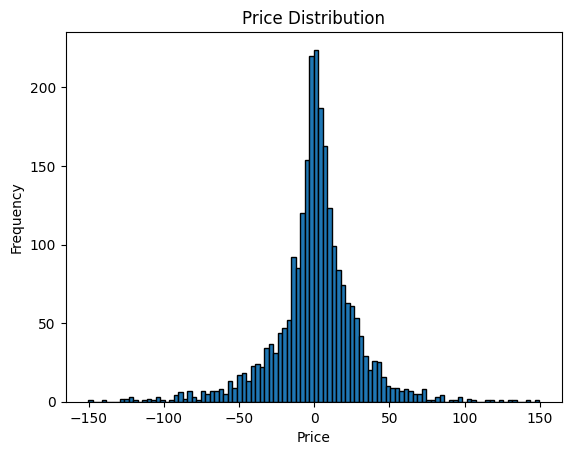

In [14]:
plt.hist(df['price change'], bins=100, edgecolor='k')  # bins=10 is an example; adjust as needed
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()